In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
df=pd.read_csv('stockmarket.csv')

In [13]:
df

,date,open,high,low,close,volume,dividend_amount
0,2005-01-03,388.7685,407.0464,388.7685,405.9997,11842921,0.0
1,2005-01-04,399.9444,407.3827,395.8329,396.8048,10059943,0.0
2,2005-01-05,392.8427,399.1970,385.9277,396.1319,16954266,0.0
3,2005-01-06,392.4690,401.0658,390.6747,393.1791,13446517,0.0
4,2005-01-07,394.7115,409.2889,394.3751,404.3176,16969845,0.0
...,...,...,...,...,...,...,...
4078,2021-07-26,2110.0000,2121.6001,2071.7000,2077.7000,378150,0.0
4079,2021-07-27,2079.0000,2083.5000,2041.2000,2054.3000,271432,0.0
4080,2021-07-28,2060.1001,2060.1499,2016.6000,2036.8500,207230,0.0
4081,2021-07-29,2050.0000,2074.3999,2043.7500,2055.2500,142646,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             4083 non-null   object 
 1   open             4083 non-null   float64
 2   high             4083 non-null   float64
 3   low              4083 non-null   float64
 4   close            4083 non-null   float64
 5   volume           4083 non-null   int64  
 6   dividend_amount  4083 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 223.4+ KB


In [15]:
df.describe()

,open,high,low,close,volume,dividend_amount
count,4083.000000,4083.000000,4083.000000,4083.000000,4.083000e+03,4083.000000
mean,1216.680093,1233.722764,1199.222622,1215.913634,3.378844e+06,0.018446
std,523.923840,534.630555,513.488006,524.068559,2.220030e+07,0.301703
min,377.517600,381.517100,372.434300,374.826500,1.417720e+05,0.000000
25%,878.274700,887.999800,866.199700,876.699750,5.299855e+05,0.000000
50%,1028.699700,1040.049700,1016.999700,1028.099600,1.079043e+06,0.000000
75%,1398.499600,1415.999600,1379.674550,1395.749600,3.100874e+06,0.000000
max,3215.999000,3252.099100,3135.249100,3216.299000,8.021841e+08,7.000000


In [16]:
df.shape

(4083, 7)

In [17]:
df.isnull().sum()


date               0
open               0
high               0
low                0
close              0
volume             0
dividend_amount    0
dtype: int64

In [22]:
df['date'] = pd.to_datetime(df['date'])


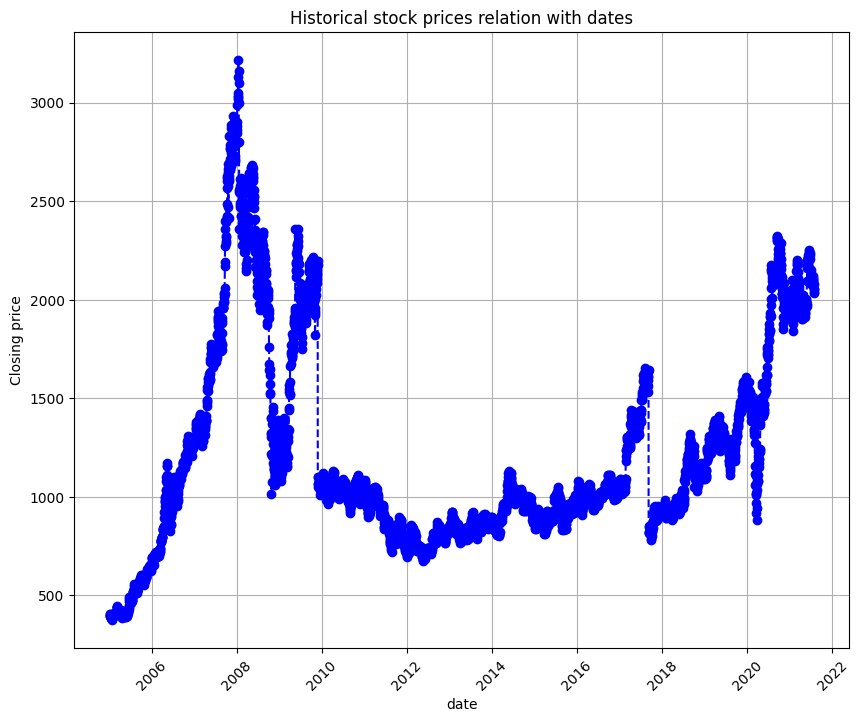

In [23]:
# task-1 plotting the historical stock prices 

plt.figure(figsize=(10,8))
plt.plot(df['date'],df['close'],marker='o' , linestyle='--',color='b')
plt.title('Historical stock prices relation with dates')
plt.xlabel('date')
plt.ylabel('Closing price')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

[]

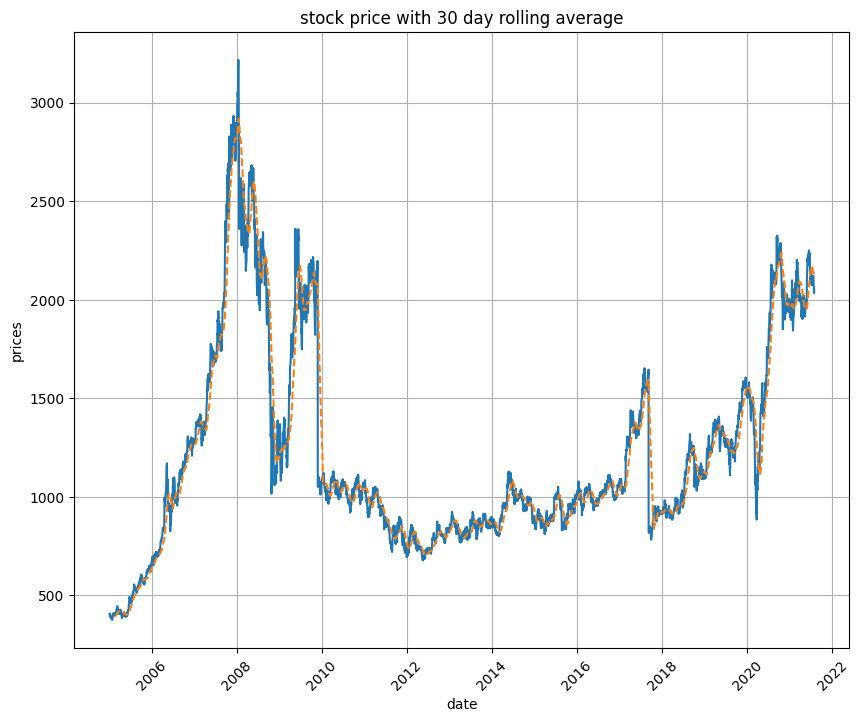

In [27]:
#rolling average
df['rolling_avg']= df['close'].rolling(window=30).mean()
plt.figure(figsize=(10,8))
plt.plot(df['date'],df['close'],label='historical price')
plt.plot(df['date'],df['rolling_avg'] , label='rolling average' , linestyle='--')
plt.title('stock price with 30 day rolling average')
plt.xlabel('date')
plt.ylabel('prices')
plt.xticks(rotation=45)
plt.grid(True)

plt.plot()

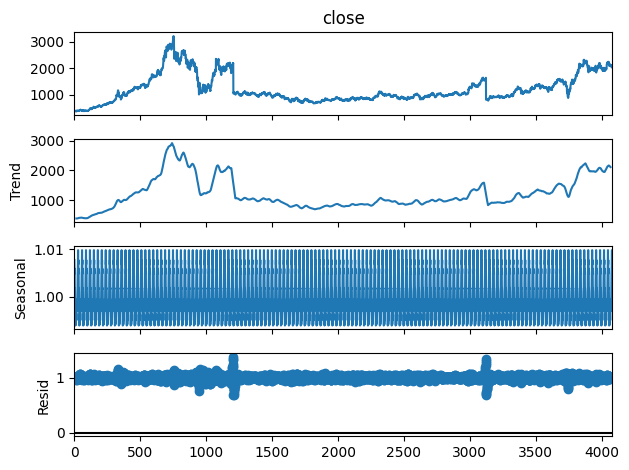

In [28]:
# seasonal decompose 

res = seasonal_decompose(df['close'] , model = 'multiplicative',period=30)
res.plot()
plt.show()

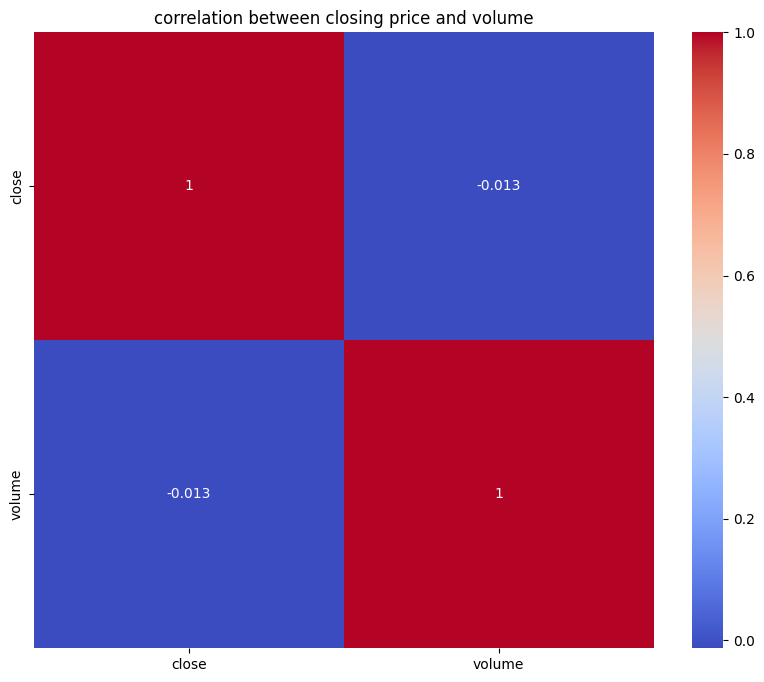

In [32]:
# correlation

plt.figure(figsize=(10,8))
sns.heatmap(df[['close' , 'volume']].corr() , annot=True , cmap = 'coolwarm')
plt.title('correlation between closing price and volume')
plt.show()

In [41]:
# model prediction

model = ARIMA(df['close'] , order =(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
print('forecasted price of stocks')
print(forecast)


forecasted price of stocks
4083    2037.564565
4084    2037.665196
4085    2038.904435
4086    2038.961306
4087    2039.452497
4088    2039.316182
4089    2039.260735
4090    2039.187045
4091    2039.175235
4092    2039.169381
4093    2039.180221
4094    2039.185601
4095    2039.188720
4096    2039.188610
4097    2039.188017
4098    2039.187277
4099    2039.186996
4100    2039.186943
4101    2039.187017
4102    2039.187082
4103    2039.187119
4104    2039.187125
4105    2039.187120
4106    2039.187112
4107    2039.187108
4108    2039.187107
4109    2039.187108
4110    2039.187109
4111    2039.187109
4112    2039.187109
Name: predicted_mean, dtype: float64


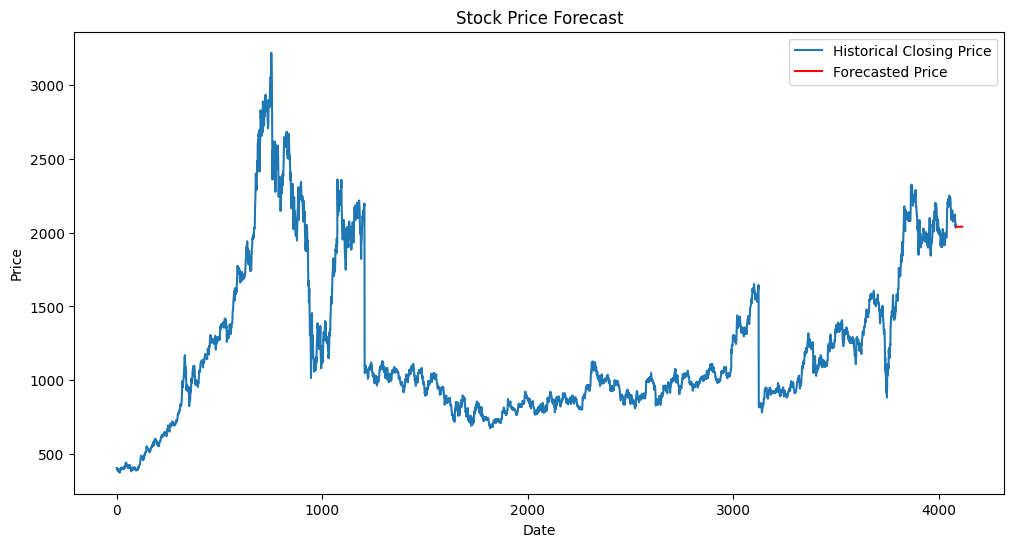

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Historical Closing Price')
plt.plot(forecast, label='Forecasted Price', color='red')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()